## Capstone Project - Pneumonia Detection 
BY - Bhupesh Kumar

### Problem Statement

Pnumonia is an infection that inflames the air sacs in one or both of the lungs. The air sacs may fill with fluid or pus(purulent material), causing cough with phlegm or pus, fever, chills, and difficult breathig. It can be found in kids, alults and seniors. In many cases it may cause a death. As a data scientist my job is to detect Pneumonia at early stage so it can be treated properly. 


### Approach

My approach is to review Chest Radiograph(CXR) with help of machine learning models to correctly identify CXR that has pneumina or not. For this task I am using dataset from kaggle competition called RSNA Pneumonia Detection Challenge. In the dataset we have about close to 30k medical images.

In [1]:
import pandas as pd
import os
import pydicom
import pylab
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_class_info = pd.read_csv('stage_2_detailed_class_info.csv')
df_train_labels = pd.read_csv('stage_2_train_labels.csv')

### Data Class info

In [3]:
df_class_info.head(10)

,patientId,class
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,No Lung Opacity / Not Normal
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,No Lung Opacity / Not Normal
2,00322d4d-1c29-4943-afc9-b6754be640eb,No Lung Opacity / Not Normal
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,Normal
4,00436515-870c-4b36-a041-de91049b9ab4,Lung Opacity
5,00436515-870c-4b36-a041-de91049b9ab4,Lung Opacity
6,00569f44-917d-4c86-a842-81832af98c30,No Lung Opacity / Not Normal
7,006cec2e-6ce2-4549-bffa-eadfcd1e9970,No Lung Opacity / Not Normal
8,00704310-78a8-4b38-8475-49f4573b2dbb,Lung Opacity
9,00704310-78a8-4b38-8475-49f4573b2dbb,Lung Opacity


In [4]:
print('\n Shape of the Data class:', df_class_info.shape)


 Shape of the Data class: (30227, 2)


In [5]:
class_info = df_class_info['class'].value_counts()

print('Three different classes for Patient ID and Count:\n', class_info)

Three different classes for Patient ID and Count:
 No Lung Opacity / Not Normal    11821
Lung Opacity                     9555
Normal                           8851
Name: class, dtype: int64


In [6]:
df_class_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30227 entries, 0 to 30226
Data columns (total 2 columns):
patientId    30227 non-null object
class        30227 non-null object
dtypes: object(2)
memory usage: 472.4+ KB


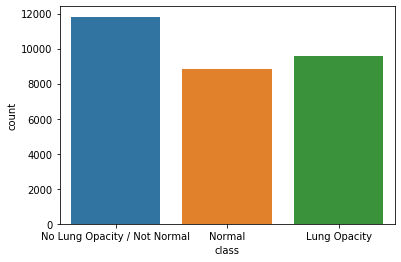

In [7]:
sns.countplot(df_class_info['class']);

    There are three different classes for patientid:
    1. No Lung Opacity / Not Normal - Meaning they don't have Pneumonia but they have other disease showing in the x-ray.
    2. Lung Opacity - Meaning they have Pneumonia
    3. Normal - Meaning they are normal and don't have any signs of Pneumonia

### Train Label

In [8]:
df_train_labels.head(10)

,patientId,x,y,width,height,Target
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,NaN,NaN,NaN,NaN,0
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,NaN,NaN,NaN,NaN,0
2,00322d4d-1c29-4943-afc9-b6754be640eb,NaN,NaN,NaN,NaN,0
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,NaN,NaN,NaN,NaN,0
4,00436515-870c-4b36-a041-de91049b9ab4,264.0,152.0,213.0,379.0,1
5,00436515-870c-4b36-a041-de91049b9ab4,562.0,152.0,256.0,453.0,1
6,00569f44-917d-4c86-a842-81832af98c30,NaN,NaN,NaN,NaN,0
7,006cec2e-6ce2-4549-bffa-eadfcd1e9970,NaN,NaN,NaN,NaN,0
8,00704310-78a8-4b38-8475-49f4573b2dbb,323.0,577.0,160.0,104.0,1
9,00704310-78a8-4b38-8475-49f4573b2dbb,695.0,575.0,162.0,137.0,1


In [9]:
print('Shape of the Label data :', df_train_labels.shape)

target_outcome = df_train_labels['Target'].value_counts()
print(' \nTarget label: \n' ,target_outcome)

Shape of the Label data : (30227, 6)
 
Target label: 
 0    20672
1     9555
Name: Target, dtype: int64


    0 = No Pneumonia 
    1 = Has Pneumian

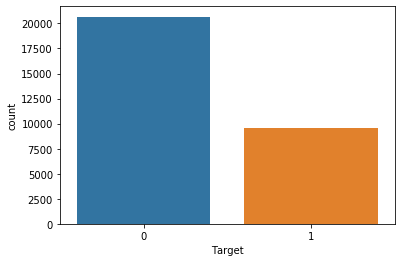

In [10]:
sns.countplot(df_train_labels['Target']);

    Looking at the train label data, we know that 20672 patients x-rays shows no sign of pneumonia, and 9555 patients has pneumonia. I will look at patient info from each category to understand the medical image data.
    
    Train label shows the x,y,width, and height in which if a patient does have a pneumonia, it draw out the boader for it.

###  CXR image (dicom) data which doest not have a pneumonia but also not normal

In [11]:
df_class_info.iloc[0]

patientId    0004cfab-14fd-4e49-80ba-63a80b6bddd6
class                No Lung Opacity / Not Normal
Name: 0, dtype: object

In [12]:
df_train_labels.iloc[0]

patientId    0004cfab-14fd-4e49-80ba-63a80b6bddd6
x                                             NaN
y                                             NaN
width                                         NaN
height                                        NaN
Target                                          0
Name: 0, dtype: object

In [13]:
dicom_0_path = './stage_2_train_images/0004cfab-14fd-4e49-80ba-63a80b6bddd6.dcm'
dcm_0_data = pydicom.read_file(dicom_0_path)

In [14]:
dcm_0_data

(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0016) SOP Class UID                       UI: Secondary Capture Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.2.276.0.7230010.3.1.4.8323329.28530.1517874485.775526
(0008, 0020) Study Date                          DA: '19010101'
(0008, 0030) Study Time                          TM: '000000.00'
(0008, 0050) Accession Number                    SH: ''
(0008, 0060) Modality                            CS: 'CR'
(0008, 0064) Conversion Type                     CS: 'WSD'
(0008, 0090) Referring Physician's Name          PN: ''
(0008, 103e) Series Description                  LO: 'view: PA'
(0010, 0010) Patient's Name                      PN: '0004cfab-14fd-4e49-80ba-63a80b6bddd6'
(0010, 0020) Patient ID                          LO: '0004cfab-14fd-4e49-80ba-63a80b6bddd6'
(0010, 0030) Patient's Birth Date                DA: ''
(0010, 0040) Patient's Sex                       CS: 'F'
(0010, 1010) Patient'

    Medical images are very confidential so some of the data is encrupted. I can still take some useful information from the data such as Patient's Age, Sex, pixel data.

In [15]:
dcm_0_data.pixel_array.shape

(1024, 1024)

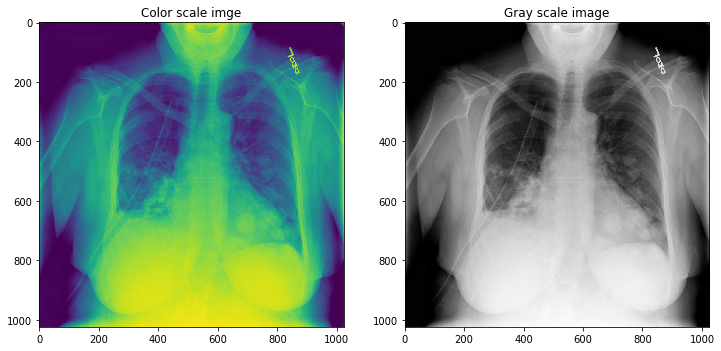

In [16]:
# Posterior(PA) view of 51 year old Female with No Lung Opacity(No pneumonia)/ not normal
# PA view is back side first going into the scan

plt.figure(figsize = (12,10))
plt.subplot(121)
plt.title('Color scale imge')
plt.imshow(dcm_0_data.pixel_array)
plt.subplot(122)
plt.title('Gray scale image')
plt.imshow(dcm_0_data.pixel_array, cmap= plt.cm.gist_gray);

###  CXR image data which patient does have a pneunomia

In [17]:
df_class_info.iloc[4]

patientId    00436515-870c-4b36-a041-de91049b9ab4
class                                Lung Opacity
Name: 4, dtype: object

In [18]:
df_train_labels.iloc[4]

patientId    00436515-870c-4b36-a041-de91049b9ab4
x                                             264
y                                             152
width                                         213
height                                        379
Target                                          1
Name: 4, dtype: object

In [19]:
dicom_4_path = './stage_2_train_images/00436515-870c-4b36-a041-de91049b9ab4.dcm'
dcm_4_data = pydicom.read_file(dicom_4_path)

In [20]:
dcm_4_data

(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0016) SOP Class UID                       UI: Secondary Capture Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.2.276.0.7230010.3.1.4.8323329.6379.1517874325.469569
(0008, 0020) Study Date                          DA: '19010101'
(0008, 0030) Study Time                          TM: '000000.00'
(0008, 0050) Accession Number                    SH: ''
(0008, 0060) Modality                            CS: 'CR'
(0008, 0064) Conversion Type                     CS: 'WSD'
(0008, 0090) Referring Physician's Name          PN: ''
(0008, 103e) Series Description                  LO: 'view: AP'
(0010, 0010) Patient's Name                      PN: '00436515-870c-4b36-a041-de91049b9ab4'
(0010, 0020) Patient ID                          LO: '00436515-870c-4b36-a041-de91049b9ab4'
(0010, 0030) Patient's Birth Date                DA: ''
(0010, 0040) Patient's Sex                       CS: 'F'
(0010, 1010) Patient's

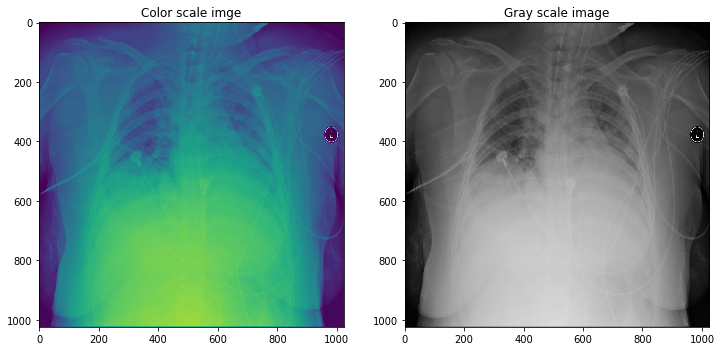

In [21]:
# Anterior(AP) view of 32 year old Female with Pnemonia
# AP is going in front side first into the x-ray machine

plt.figure(figsize = (12,10))
plt.subplot(121)
plt.title('Color scale imge')
plt.imshow(dcm_4_data.pixel_array)
plt.subplot(122)
plt.title('Gray scale image')
plt.imshow(dcm_4_data.pixel_array, cmap= plt.cm.gist_gray);

### CXR Image of patient that is completly normal

In [22]:
df_class_info.iloc[30223]

patientId    c1edf42b-5958-47ff-a1e7-4f23d99583ba
class                                      Normal
Name: 30223, dtype: object

In [24]:
dicom_30223_path = './stage_2_train_images/c1edf42b-5958-47ff-a1e7-4f23d99583ba.dcm'
dcm_30223_data = pydicom.read_file(dicom_30223_path)

In [25]:
dcm_30223_data

(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0016) SOP Class UID                       UI: Secondary Capture Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.2.276.0.7230010.3.1.4.8323329.22672.1517874443.53337
(0008, 0020) Study Date                          DA: '19010101'
(0008, 0030) Study Time                          TM: '000000.00'
(0008, 0050) Accession Number                    SH: ''
(0008, 0060) Modality                            CS: 'CR'
(0008, 0064) Conversion Type                     CS: 'WSD'
(0008, 0090) Referring Physician's Name          PN: ''
(0008, 103e) Series Description                  LO: 'view: PA'
(0010, 0010) Patient's Name                      PN: 'c1edf42b-5958-47ff-a1e7-4f23d99583ba'
(0010, 0020) Patient ID                          LO: 'c1edf42b-5958-47ff-a1e7-4f23d99583ba'
(0010, 0030) Patient's Birth Date                DA: ''
(0010, 0040) Patient's Sex                       CS: 'F'
(0010, 1010) Patient's

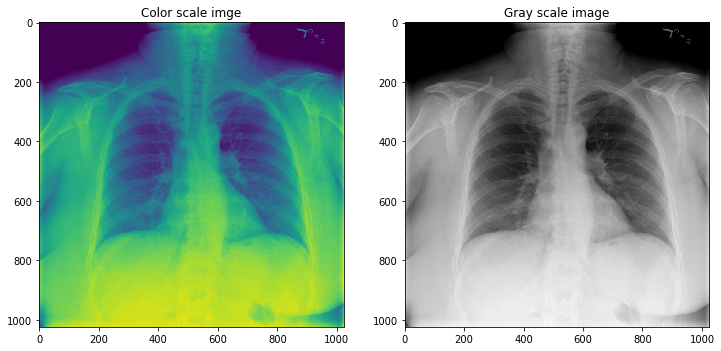

In [27]:
# Posterior view of 46 year old Female with Normal chest x-ray

plt.figure(figsize = (12,10))
plt.subplot(121)
plt.title('Color scale imge')
plt.imshow(dcm_30223_data.pixel_array)
plt.subplot(122)
plt.title('Gray scale image')
plt.imshow(dcm_30223_data.pixel_array, cmap = plt.cm.gist_gray);

    Looking at all three CXR images, we can see the significant differnce between different images.
    However, it's hard to indentify which one is which without having prior knowlwdge in medicine or CXR images.
    
    Dicome images has really good useful data that can help do some analysis on patients

# All images 

### Path for all dicom files

In [28]:
path_for_all = dicom_4_path = './stage_2_train_images/'
image_data = os.listdir(path_for_all)
len(image_data)

26684

Few things I am intersted in looking at the Meta Data is Patients Age, Sex, view postions, picxel rows, pixel column. So I will extract that from DICOM files.

In [29]:
# Getting useful information from dicom files
patient_info = []
for i in df_train_labels['patientId']:
    path_for_all_patient = './stage_2_train_images/%s.dcm' % i
    patient_dcm_data = pydicom.read_file(path_for_all_patient)
    patient_info.append([i,
                         patient_dcm_data.PatientAge,
                         patient_dcm_data.PatientSex,
                         patient_dcm_data.ViewPosition,
                         patient_dcm_data.Rows,
                         patient_dcm_data.Columns]) 

In [30]:
print('Type of patient info :',type(patient_info))
patient_info[:5]

Type of patient info : <class 'list'>


[['0004cfab-14fd-4e49-80ba-63a80b6bddd6', '51', 'F', 'PA', 1024, 1024],
 ['00313ee0-9eaa-42f4-b0ab-c148ed3241cd', '48', 'F', 'PA', 1024, 1024],
 ['00322d4d-1c29-4943-afc9-b6754be640eb', '19', 'M', 'AP', 1024, 1024],
 ['003d8fa0-6bf1-40ed-b54c-ac657f8495c5', '28', 'M', 'PA', 1024, 1024],
 ['00436515-870c-4b36-a041-de91049b9ab4', '32', 'F', 'AP', 1024, 1024]]

In [31]:
df_patient_info = pd.DataFrame(data = patient_info, columns = ['patientId',
                                                               'patient_age',
                                                               'patient_sex',
                                                               'patient_view_position',
                                                               'pixel_rows',
                                                               'pixel_colums'])

In [32]:
df_patient_info.head()

,patientId,patient_age,patient_sex,patient_view_position,pixel_rows,pixel_colums
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,51,F,PA,1024,1024
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,48,F,PA,1024,1024
2,00322d4d-1c29-4943-afc9-b6754be640eb,19,M,AP,1024,1024
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,28,M,PA,1024,1024
4,00436515-870c-4b36-a041-de91049b9ab4,32,F,AP,1024,1024


In [33]:
df_patient_info.dtypes

patientId                object
patient_age              object
patient_sex              object
patient_view_position    object
pixel_rows                int64
pixel_colums              int64
dtype: object

In [34]:
df_patient_info['patient_age'] = df_patient_info['patient_age'].apply(int)

In [35]:
df_patient_info.dtypes

patientId                object
patient_age               int64
patient_sex              object
patient_view_position    object
pixel_rows                int64
pixel_colums              int64
dtype: object

In [36]:
df_patient_info.shape

(30227, 6)

### Combining all data (df_patient_info) from dicom files, (df_train_labels), and (df_class_info) into one dataframe

In [37]:
full_dataset = pd.concat([df_patient_info,df_train_labels,df_class_info],axis =1)

In [38]:
full_dataset.head()

,patientId,patient_age,patient_sex,patient_view_position,pixel_rows,pixel_colums,patientId,x,y,width,height,Target,patientId,class
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,51,F,PA,1024,1024,0004cfab-14fd-4e49-80ba-63a80b6bddd6,NaN,NaN,NaN,NaN,0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,No Lung Opacity / Not Normal
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,48,F,PA,1024,1024,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,NaN,NaN,NaN,NaN,0,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,No Lung Opacity / Not Normal
2,00322d4d-1c29-4943-afc9-b6754be640eb,19,M,AP,1024,1024,00322d4d-1c29-4943-afc9-b6754be640eb,NaN,NaN,NaN,NaN,0,00322d4d-1c29-4943-afc9-b6754be640eb,No Lung Opacity / Not Normal
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,28,M,PA,1024,1024,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,NaN,NaN,NaN,NaN,0,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,Normal
4,00436515-870c-4b36-a041-de91049b9ab4,32,F,AP,1024,1024,00436515-870c-4b36-a041-de91049b9ab4,264.0,152.0,213.0,379.0,1,00436515-870c-4b36-a041-de91049b9ab4,Lung Opacity


In [39]:
full_dataset.shape

(30227, 14)

In [40]:
full_dataset['patientId'].head()

,patientId,patientId,patientId
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,0004cfab-14fd-4e49-80ba-63a80b6bddd6,0004cfab-14fd-4e49-80ba-63a80b6bddd6
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,00313ee0-9eaa-42f4-b0ab-c148ed3241cd
2,00322d4d-1c29-4943-afc9-b6754be640eb,00322d4d-1c29-4943-afc9-b6754be640eb,00322d4d-1c29-4943-afc9-b6754be640eb
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,003d8fa0-6bf1-40ed-b54c-ac657f8495c5
4,00436515-870c-4b36-a041-de91049b9ab4,00436515-870c-4b36-a041-de91049b9ab4,00436515-870c-4b36-a041-de91049b9ab4


### since all three dataset has patientid,  I will drop 2 of the redundant columns

In [41]:
full_dataset = full_dataset.loc[:,~full_dataset.columns.duplicated()]

In [42]:
full_dataset.shape

(30227, 12)

In [43]:
full_dataset.head()

,patientId,patient_age,patient_sex,patient_view_position,pixel_rows,pixel_colums,x,y,width,height,Target,class
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,51,F,PA,1024,1024,NaN,NaN,NaN,NaN,0,No Lung Opacity / Not Normal
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,48,F,PA,1024,1024,NaN,NaN,NaN,NaN,0,No Lung Opacity / Not Normal
2,00322d4d-1c29-4943-afc9-b6754be640eb,19,M,AP,1024,1024,NaN,NaN,NaN,NaN,0,No Lung Opacity / Not Normal
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,28,M,PA,1024,1024,NaN,NaN,NaN,NaN,0,Normal
4,00436515-870c-4b36-a041-de91049b9ab4,32,F,AP,1024,1024,264.0,152.0,213.0,379.0,1,Lung Opacity


In [44]:
full_dataset.tail()

,patientId,patient_age,patient_sex,patient_view_position,pixel_rows,pixel_colums,x,y,width,height,Target,class
30222,c1ec14ff-f6d7-4b38-b0cb-fe07041cbdc8,54,M,AP,1024,1024,185.0,298.0,228.0,379.0,1,Lung Opacity
30223,c1edf42b-5958-47ff-a1e7-4f23d99583ba,46,F,PA,1024,1024,NaN,NaN,NaN,NaN,0,Normal
30224,c1f6b555-2eb1-4231-98f6-50a963976431,45,M,PA,1024,1024,NaN,NaN,NaN,NaN,0,Normal
30225,c1f7889a-9ea9-4acb-b64c-b737c929599a,72,F,AP,1024,1024,570.0,393.0,261.0,345.0,1,Lung Opacity
30226,c1f7889a-9ea9-4acb-b64c-b737c929599a,72,F,AP,1024,1024,233.0,424.0,201.0,356.0,1,Lung Opacity


In [45]:
# Any Null values
full_dataset.isnull().sum()

patientId                    0
patient_age                  0
patient_sex                  0
patient_view_position        0
pixel_rows                   0
pixel_colums                 0
x                        20672
y                        20672
width                    20672
height                   20672
Target                       0
class                        0
dtype: int64

    I know from above that 20672 patients doesn't have pneummonia so that's why x,y, width and height doens't are null values and I will leave it as it is.

In [58]:
full_dataset.describe()

,patient_age,pixel_rows,pixel_colums,x,y,width,height,Target
count,30227.000000,30227.0,30227.0,9555.000000,9555.000000,9555.000000,9555.000000,30227.000000
mean,46.797764,1024.0,1024.0,394.047724,366.839560,218.471376,329.269702,0.316108
std,16.892940,0.0,0.0,204.574172,148.940488,59.289475,157.750755,0.464963
min,1.000000,1024.0,1024.0,2.000000,2.000000,40.000000,45.000000,0.000000
25%,34.000000,1024.0,1024.0,207.000000,249.000000,177.000000,203.000000,0.000000
50%,49.000000,1024.0,1024.0,324.000000,365.000000,217.000000,298.000000,0.000000
75%,59.000000,1024.0,1024.0,594.000000,478.500000,259.000000,438.000000,1.000000
max,155.000000,1024.0,1024.0,835.000000,881.000000,528.000000,942.000000,1.000000


#### Patient data

In [61]:
full_dataset['class'].value_counts()

No Lung Opacity / Not Normal    11821
Lung Opacity                     9555
Normal                           8851
Name: class, dtype: int64

In [62]:
full_dataset['Target'].value_counts()

0    20672
1     9555
Name: Target, dtype: int64

    Out of 30227 patients only 9555 are true patients with lung Opacity(Pneumonia)

#### (Male/Female)

In [63]:
full_dataset['patient_sex'].value_counts()

M    17216
F    13011
Name: patient_sex, dtype: int64

In [52]:
full_dataset[(full_dataset['patient_sex'] == 'F') & full_dataset['Target'] == 1].count()

patientId                3995
patient_age              3995
patient_sex              3995
patient_view_position    3995
pixel_rows               3995
pixel_colums             3995
x                        3995
y                        3995
width                    3995
height                   3995
Target                   3995
class                    3995
dtype: int64

In [51]:
full_dataset[(full_dataset['patient_sex'] == 'M') & full_dataset['Target'] == 1].count()

patientId                5560
patient_age              5560
patient_sex              5560
patient_view_position    5560
pixel_rows               5560
pixel_colums             5560
x                        5560
y                        5560
width                    5560
height                   5560
Target                   5560
class                    5560
dtype: int64

    Male has more lung opacity then women in this dataset

#### View position

In [64]:
full_dataset['patient_view_position'].value_counts()

AP    15297
PA    14930
Name: patient_view_position, dtype: int64

In [65]:
full_dataset[(full_dataset['patient_view_position'] == 'AP') & full_dataset['Target'] == 1].count()

patientId                7788
patient_age              7788
patient_sex              7788
patient_view_position    7788
pixel_rows               7788
pixel_colums             7788
x                        7788
y                        7788
width                    7788
height                   7788
Target                   7788
class                    7788
dtype: int64

    CXR with view position AP has 7788 patient with pneumonia and rest 1767 had view position if PA

In [66]:
full_dataset[(full_dataset['patient_age'] > 65 ) & full_dataset['Target'] == 1].count()

patientId                1215
patient_age              1215
patient_sex              1215
patient_view_position    1215
pixel_rows               1215
pixel_colums             1215
x                        1215
y                        1215
width                    1215
height                   1215
Target                   1215
class                    1215
dtype: int64

In [72]:
full_dataset[(full_dataset['patient_age'] < 5 ) & full_dataset['Target'] == 1].count()

patientId                23
patient_age              23
patient_sex              23
patient_view_position    23
pixel_rows               23
pixel_colums             23
x                        23
y                        23
width                    23
height                   23
Target                   23
class                    23
dtype: int64

    Researh states that people with age greater then 65 and children with age less then 5 are at high risk of pneumonia. However, that's not the case with this dataset. It's doen't have enough data on children under 5.

In [57]:
full_dataset.to_csv('full_patient_dataset', index = False)